<a href="https://colab.research.google.com/github/niklasgrimm98/Digital-Organization/blob/main/Kopie_von_questions_chapter2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Digital Organisations/kc_house_data.csv")


data.head(10)

Mounted at /content/drive


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?


A sequence of data processing components is called a data pipeline. Pipelines are very
common in machine learning systems, since there is a lot of data to manipulate and
many data transformations to apply.

Since our data is labeled, it is a supervised learning task. Because we want to estimate the price based on the other variables, it is a regression task. We use batch learning, the data is fetched into the model once and not uptated on a regular basis. 

A performance measure indicates how well the model performs, how much the average prediction deviates from the actual values. Typical performance measure are RMSE and MAE.
 



##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

In [ ]:
data.describe()# YOUR TASK

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
data['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

Most of the distributions are right skewed, meaning that they are extend further to the right of the median than to the left. The scales are quite different from varibale to variable. yr_renovated displays the year in which the house was renovated. If the house has not been renovated, the value is 0, perhaps that will cause problems in the future.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

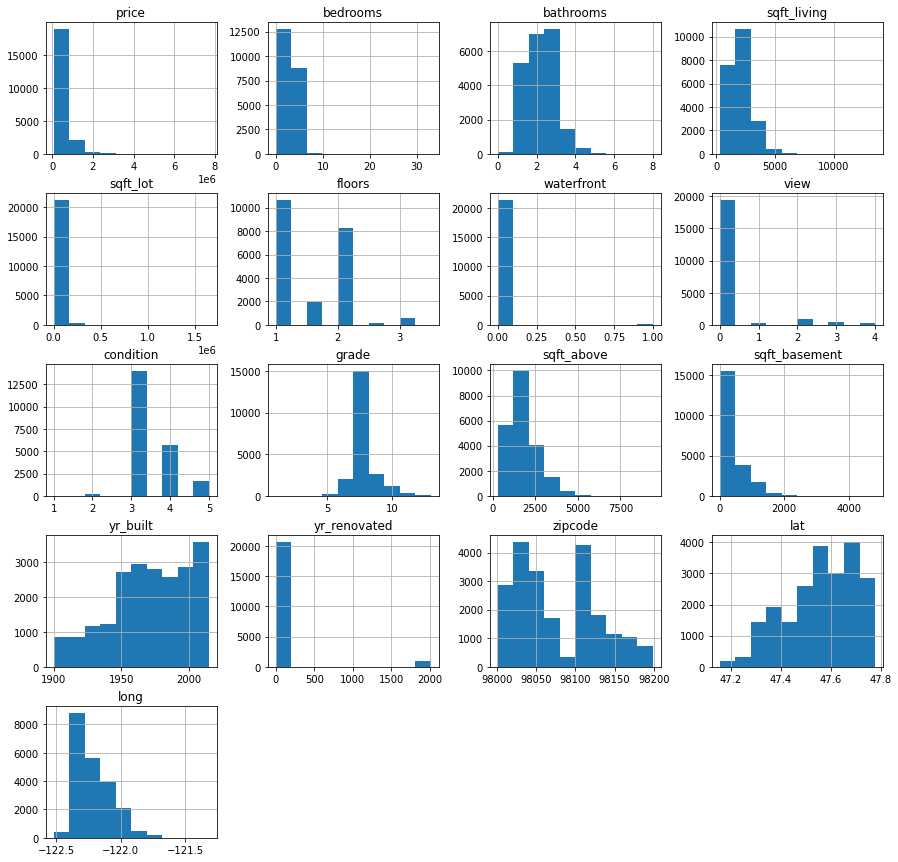

In [ ]:
data.hist(figsize = (15,15))# YOUR TASK

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning
data['date'] = pd.to_datetime(data['date'])
data['renovated'] = data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
data['yr_renovated'] = np.maximum(data['yr_renovated'], data['yr_built'])

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,0


##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

The population is divided
into homogeneous subgroups called strata, and the right number of instances are
sampled from each stratum to guarantee that the test set is representative of the
overall population

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, random_state=42)

train_set['price_category'] = pd.cut(train_set['price'], bins= [0.,10000, 100000,200000, 600000, 1000000., np.inf])
test_set['price_category'] = pd.cut(test_set['price'], bins=  [0.,10000, 100000,200000, 600000, 1000000., np.inf])

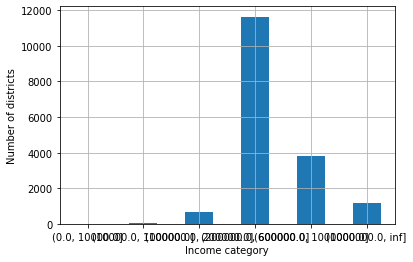

In [ ]:
train_set['price_category'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()


In [ ]:
data = train_set.copy()
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_category
6325,2014-05-27,325000.0,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,1983,98042,47.3670,-122.152,0,"(200000.0, 600000.0]"
13473,2015-03-10,257000.0,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,1929,98118,47.5520,-122.290,0,"(200000.0, 600000.0]"
17614,2015-02-26,228500.0,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,1942,98146,47.4838,-122.335,0,"(200000.0, 600000.0]"
16970,2015-01-08,288000.0,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,1977,98031,47.3951,-122.172,0,"(200000.0, 600000.0]"
20868,2015-04-17,479000.0,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,2007,98034,47.7043,-122.209,0,"(200000.0, 600000.0]"
8993,2014-08-11,459900.0,3,1.75,2340,51836,1.5,0,0,3,8,1510,830,1978,1978,98027,47.4846,-122.035,0,"(200000.0, 600000.0]"
10432,2014-06-03,449500.0,5,2.75,2040,7488,1.0,0,0,4,7,1200,840,1969,1969,98034,47.7289,-122.172,0,"(200000.0, 600000.0]"
10163,2015-01-13,769000.0,5,2.25,3320,13138,1.0,0,2,4,9,1900,1420,1964,1964,98028,47.7590,-122.269,0,"(600000.0, 1000000.0]"
17889,2014-06-10,680000.0,3,1.75,1760,8400,1.0,0,0,4,8,1460,300,1960,1960,98136,47.5355,-122.390,0,"(600000.0, 1000000.0]"
13246,2015-03-27,293500.0,3,2.50,1610,5024,2.0,0,0,3,7,1610,0,2004,2004,98038,47.3833,-122.043,0,"(200000.0, 600000.0]"


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


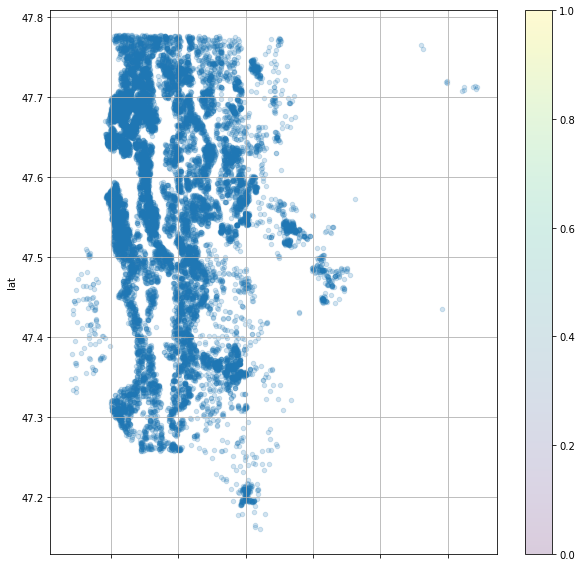

In [ ]:
data.plot(kind='scatter', x='long', y='lat', grid=True, alpha= 0.2, colorbar=True,legend=True, figsize=(10,10))
plt.show()

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

In [ ]:
# YOUR TASK
corr_matrix = data.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated
price,1.000000,0.308262,0.526618,0.701701,0.091039,0.253425,0.252946,0.392108,0.036344,0.665093,0.603255,0.321387,0.049100,0.102613,-0.053803,0.310770,0.023486,0.127426
bedrooms,0.308262,1.000000,0.515266,0.575048,0.031054,0.172962,-0.010044,0.070176,0.028185,0.353513,0.474386,0.300806,0.148824,0.161116,-0.152708,-0.013322,0.126010,0.020627
bathrooms,0.526618,0.515266,1.000000,0.752745,0.086344,0.504126,0.063145,0.179657,-0.124764,0.664407,0.683303,0.277038,0.505649,0.537737,-0.202922,0.026761,0.221848,0.050887
sqft_living,0.701701,0.575048,0.752745,1.000000,0.176264,0.348917,0.095543,0.275554,-0.056163,0.760652,0.875820,0.427831,0.315848,0.342237,-0.203540,0.053920,0.242701,0.054634
sqft_lot,0.091039,0.031054,0.086344,0.176264,1.000000,-0.004670,0.027354,0.061524,-0.010531,0.116535,0.187159,0.014017,0.051956,0.054465,-0.135121,-0.078886,0.240164,0.015531
floors,0.253425,0.172962,0.504126,0.348917,-0.004670,1.000000,0.018441,0.027260,-0.268652,0.457274,0.518214,-0.248916,0.495168,0.511345,-0.054722,0.054014,0.121500,0.005392
waterfront,0.252946,-0.010044,0.063145,0.095543,0.027354,0.018441,1.000000,0.390616,0.017313,0.070820,0.063283,0.079072,-0.030817,-0.007294,0.026815,-0.018784,-0.043843,0.088728
view,0.392108,0.070176,0.179657,0.275554,0.061524,0.027260,0.390616,1.000000,0.048571,0.244440,0.159612,0.270938,-0.058776,-0.024010,0.084540,0.005750,-0.086336,0.100200
condition,0.036344,0.028185,-0.124764,-0.056163,-0.010531,-0.268652,0.017313,0.048571,1.000000,-0.143680,-0.158199,0.180120,-0.361492,-0.396805,0.003919,-0.018660,-0.109123,-0.061370
grade,0.665093,0.353513,0.664407,0.760652,0.116535,0.457274,0.070820,0.244440,-0.143680,1.000000,0.752990,0.162885,0.447234,0.461580,-0.182515,0.118808,0.197489,0.013339


Correlation of close to 1 means great positiv correlation. Corellation close to -1 means great negative correlation. 0 means no linear correlation. price and sqft_living have a correlation of 0.7, therefor it is likely a great variable to predict the price. 
Correlation does not mena causality. Just because two variables are related doesnt mean that one causes the other. 

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

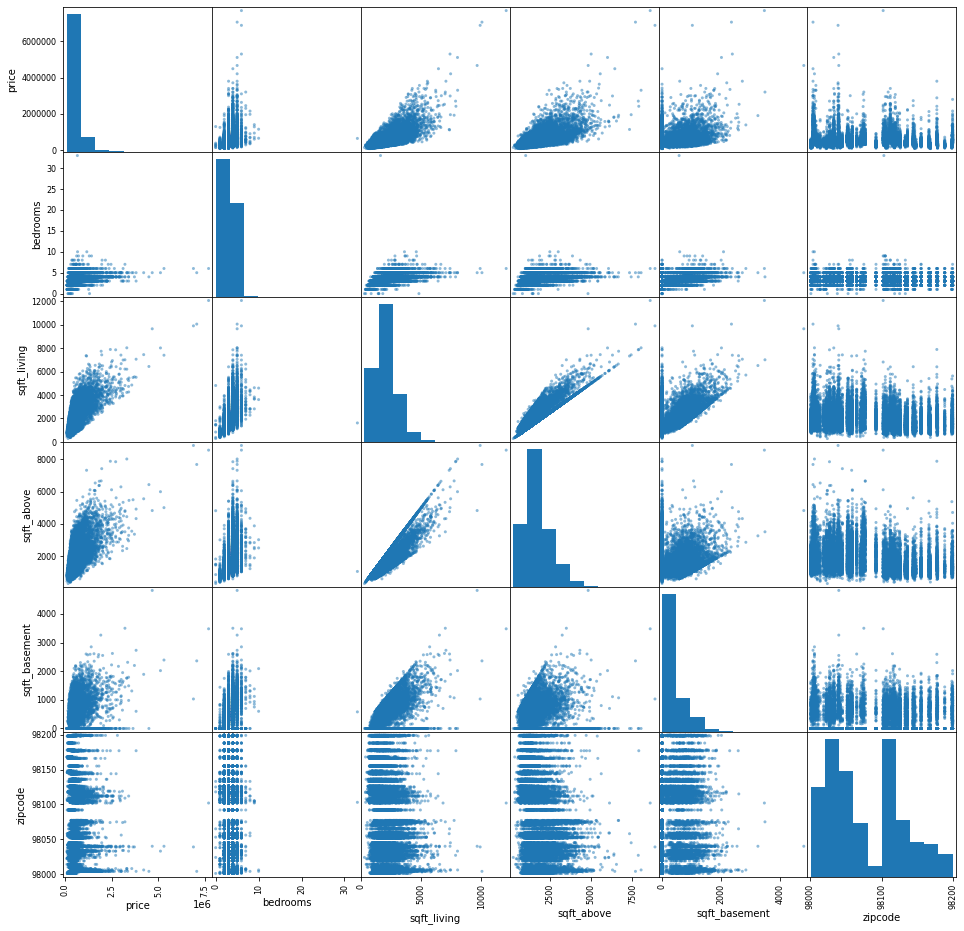

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "bedrooms", "sqft_living", "sqft_above", "sqft_basement", "zipcode"]

scatter_matrix(data[attributes], figsize = (16,16))
plt.show()

#YOUR TASK

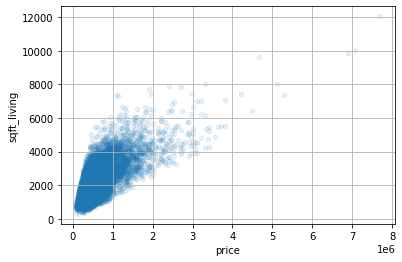

In [ ]:
data.plot(kind="scatter", x="price", y="sqft_living",
 alpha=0.1, grid=True)
plt.show()

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [ ]:
data['bedroom_density'] = data['bedrooms'] / data['sqft_living']

In [ ]:
corr_matrix = data.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,bedroom_density
price,1.000000,0.308262,0.526618,0.701701,0.091039,0.253425,0.252946,0.392108,0.036344,0.665093,0.603255,0.321387,0.049100,0.102613,-0.053803,0.310770,0.023486,0.127426,-0.465692
bedrooms,0.308262,1.000000,0.515266,0.575048,0.031054,0.172962,-0.010044,0.070176,0.028185,0.353513,0.474386,0.300806,0.148824,0.161116,-0.152708,-0.013322,0.126010,0.020627,0.072229
bathrooms,0.526618,0.515266,1.000000,0.752745,0.086344,0.504126,0.063145,0.179657,-0.124764,0.664407,0.683303,0.277038,0.505649,0.537737,-0.202922,0.026761,0.221848,0.050887,-0.513615
sqft_living,0.701701,0.575048,0.752745,1.000000,0.176264,0.348917,0.095543,0.275554,-0.056163,0.760652,0.875820,0.427831,0.315848,0.342237,-0.203540,0.053920,0.242701,0.054634,-0.677128
sqft_lot,0.091039,0.031054,0.086344,0.176264,1.000000,-0.004670,0.027354,0.061524,-0.010531,0.116535,0.187159,0.014017,0.051956,0.054465,-0.135121,-0.078886,0.240164,0.015531,-0.143881
floors,0.253425,0.172962,0.504126,0.348917,-0.004670,1.000000,0.018441,0.027260,-0.268652,0.457274,0.518214,-0.248916,0.495168,0.511345,-0.054722,0.054014,0.121500,0.005392,-0.306858
waterfront,0.252946,-0.010044,0.063145,0.095543,0.027354,0.018441,1.000000,0.390616,0.017313,0.070820,0.063283,0.079072,-0.030817,-0.007294,0.026815,-0.018784,-0.043843,0.088728,-0.083417
view,0.392108,0.070176,0.179657,0.275554,0.061524,0.027260,0.390616,1.000000,0.048571,0.244440,0.159612,0.270938,-0.058776,-0.024010,0.084540,0.005750,-0.086336,0.100200,-0.221928
condition,0.036344,0.028185,-0.124764,-0.056163,-0.010531,-0.268652,0.017313,0.048571,1.000000,-0.143680,-0.158199,0.180120,-0.361492,-0.396805,0.003919,-0.018660,-0.109123,-0.061370,0.086742
grade,0.665093,0.353513,0.664407,0.760652,0.116535,0.457274,0.070820,0.244440,-0.143680,1.000000,0.752990,0.162885,0.447234,0.461580,-0.182515,0.118808,0.197489,0.013339,-0.584435


##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

In [ ]:
data[data.isnull().any(axis=1)]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,price_category


Dealing with missing values, we can either leave out the whole rows that include missing items, get rid of the attribute with a lot of missing values or replace the missing values with some value(zero, median,mean, max, etc). The simpleimputer replaces every missing value, in our case with the media(beacause of strategy selection).

###Handling Text and Categorical Attributes


What are ordinal and categorical data? Do we have such data in our data set? What possibilities do we have to transform this data correctly? What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

Ordinal data is categorical data that is ranked. An example are categories like fast medium and slow. It doesnt tell us how far the categories are apart from each other, but have a clear order. Categorical data has no order, for example colors. We dont really have categorical data in our dataset, waterfront already is a dummy variable in my opinion. OneHotEncoder takes our variable and puts it into a 2d array. This is not so usefull in our case since it was only 0 and 1 from the start, but if we had more categories, the function would transform it to an array of greater dimension and more dummy variables. Dummy variables are just 0 or 1. To avoid giving higher weight to a categorical variable with a greater index, we can instead transfrom to categories to multiple dummy variables. 

In [ ]:
data['waterfront'].describe()

count    17290.000000
mean         0.007172
std          0.084385
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# create an instance of OneHotEncoder
cat_encoder = OneHotEncoder()

# reshape 'waterfront' column to a 2D array
waterfront_2d = data['waterfront'].values.reshape(-1, 1)

# fit and transform the reshaped data
waterfront_encoded = cat_encoder.fit_transform(waterfront_2d)

In [ ]:
waterfront_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

Min-max scaling (many people call this normalization) is the simplest: for each
attribute, the values are shifted and rescaled so that they end up ranging from
0 to 1. This is performed by subtracting the min value and dividing by the dif‐
ference between the min and the max. Standardization is different: first it subtracts the mean value (so standardized values
have a zero mean), then it divides the result by the standard deviation (so standard‐
ized values have a standard deviation equal to 1). Unlike min-max scaling, standardi‐
zation does not restrict values to a specific range
Heavy Tail: Values far from the mean are not exponentially rare.  The problems with min-max scaling on a heavy-tailed distribution is that the data range might be domintated by the outliers. 

In [ ]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated', 'price_category'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?

It probably makes sense to convert the yr variables, since the start at a high value and only differ little. Converting the sqft variables is probably also usefull since i guess they have a heavy tail. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


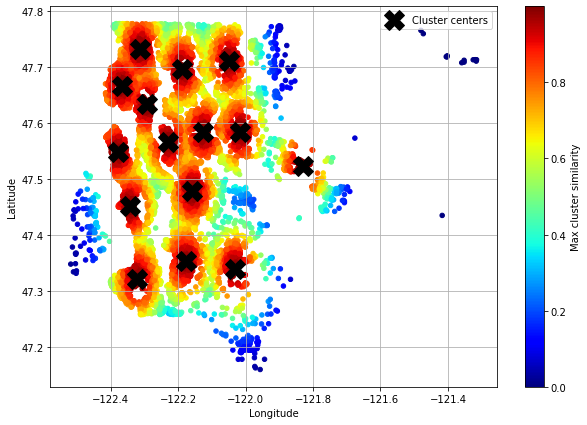

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


(17290, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

In [ ]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


The code fits the datapoints to a linear regression


In [ ]:
data_predictions = np.exp(data_predictions)
data_predictions

array([[353001.28330967],
       [303665.79082648],
       [204187.25464585],
       ...,
       [435625.60304474],
       [108689.89102157],
       [370974.82272545]])

In [ ]:
data_label

,price
6325,325000.0
13473,257000.0
17614,228500.0
16970,288000.0
20868,479000.0
...,...
11964,378000.0
21575,399950.0
5390,575000.0
860,245000.0


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

In [ ]:
abs_error = np.abs(data_predictions - data_label)
median_abs_error = np.median(abs_error)
rmse = np.sqrt(np.mean((data_predictions - data_label) ** 2))

 #Calculate median of all home prices
median_home_price = np.median(data_label)

#Print the results
print("Median of the absolute error:", median_abs_error)
print("RMSE:", rmse)
print("Median home price:", median_home_price)

Median of the absolute error: 50351.342352658176
RMSE: price    144777.348617
dtype: float64
Median home price: 450000.0


###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, t

One way to evaluate the decision tree model would be to use the train_
test_split() function to split the training set into a smaller training set and a
validation set, then train your models against the smaller training set and evaluate
them against the validation set

The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [ ]:
pd.Series(forest_rmses).describe()

count        10.000000
mean    -128530.925259
std       15645.129658
min     -164473.023933
25%     -134267.337152
50%     -123076.503022
75%     -120548.257400
max     -112721.859345
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

Grid search will look for all combinations of definded hyperparameters. It takes a lot of time and might waste time in regions where it is not useful to search for the best hyperparameter, but you get a good overview of all combinations. Random search searches a fixed number of combinations, selecting a random search for every iteration.  

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

final_predictions = forest_reg.predict(X_test)

final_rmse = np.sqrt(np.mean((final_predictions - y_test) ** 2))
final_rmse

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


673027.9593722507

##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

In [ ]:

import joblib

joblib.dump(forest_reg, "random_forest_model.pkl")


['random_forest_model.pkl']

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 